# **Project Name:** Exploratory Data Analysis on Amazon Prime Video Content

## Uncovering trends, patterns, and insights from Amazon Prime’s content library



# **Project Summary -**

This project focuses on performing Exploratory Data Analysis (EDA) on Amazon Prime Video’s content dataset to derive meaningful insights that can assist in data-driven decision-making for content strategy, audience engagement, and business planning.

As streaming platforms operate in a competitive landscape, understanding what type of content resonates with viewers, how content trends evolve, and which segments require focus is critical for driving subscriptions and user retention. This analysis aims to support Amazon Prime Video in aligning its content offerings with viewer interests while identifying opportunities for expansion and optimization.

**Data Collection and Preparation**: Two datasets (titles.csv and credits.csv) containing information about titles and credits for Amazon Prime Video were merged using the id column to create a unified dataset for analysis. The data cleaning process included handling missing values systematically by filling categorical nulls with relevant placeholders like “Unknown” and numerical nulls with median values to prevent data loss. Duplicate records were removed, data types were standardized, and the dataset was checked for logical inconsistencies, ensuring a robust foundation for analysis.

**Data Visualization**: Descriptive statistics were generated to understand the distribution, central tendencies, and variability in key features such as runtime, IMDb ratings, and release years. Various visualization techniques were used, including box plots, histograms, bar charts, scatter plots, violin plots, line plots, and heatmaps to uncover hidden patterns and relationships within the dataset. This enabled clear identification of trends across multiple dimensions like genres, content type, certifications, and popularity metrics.

**Key Insights**
- Amazon Prime’s catalog primarily consists of movies, with TV shows forming a smaller but notable segment focused on short formats and mini-series.
- Drama, Comedy, and Action are the most common genres, highlighting strong viewer demand and current content priorities.
- Release Patterns: Content additions have increased significantly post-2010, aligning with a focus on providing recent and relevant content.
- Most titles have runtimes around 90–110 minutes, and IMDb ratings typically range between 5.5 and 7, reflecting moderate to good audience reception.
- Content is largely targeted towards 13+ and 16+ audiences, showing a focus on teen and young adult viewers.
- The United States, UK, and India are the top content-producing regions on the platform, supporting regional diversity.
- Popularity does not strongly correlate with high IMDb ratings, indicating that quality content should remain a focus alongside popularity.


# **GitHub Link**

https://github.com/Mukul703/Intership_Project/tree/main/Amazon_Prime_Content_EDA

# **Problem Statement**

This project focuses on analyzing Amazon Prime Video’s content dataset to derive data-driven insights that support decision-making and strategic planning. The analysis emphasizes:

**Content Diversity**: Which genres and categories are most prevalent on the platform, helping to understand content variety and audience interests.

**Trends Over Time**: Examining how Amazon Prime’s content offerings have evolved over time to align with shifting viewer interests and market trends, enabling data-backed forecasting and planning.

 **IMDb Ratings & Popularity**: Which titles are the highest-rated and most popular on the platform, identifying high-performing content and factors driving user engagement.

This analysis helps streaming platforms discover what drives subscriptions, refine their content choices, and keep viewers engaged for longer.

# **Business Objective**

To uncover insights from Amazon Prime Video data that help improve content strategy, enhance viewer engagement, and support data-driven decisions for maximizing subscriptions and retention.

# **Know Your Dataset**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
prime_data.to_pickle('amazon_prime_cleaned.pkl')

In [ ]:
prime_data_loaded = pd.read_pickle('amazon_prime_cleaned.pkl')

### Dataset Loading & Merging

In [ ]:
# Upload Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset

try:
    titles = pd.read_csv('/content/drive/MyDrive/Amazon Prime Projects Data Source/titles.csv')
    print("Titles dataset loaded successfully.")
except FileNotFoundError:
    print("titles file not found. Please check the file path.")
except pd.errors.ParserError:   # Handle error if CSV file is corrupted or has invalid structure
    print("titles could not be parsed. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while loading titles.csv: {e}")
try:
    credits = pd.read_csv('/content/drive/MyDrive/Amazon Prime Projects Data Source/credits.csv')
except FileNotFoundError:
    print("credits file not found. Please check the file path.")
except pd.errors.ParserError:   # Handle error if CSV file is corrupted or has invalid structure
    print("credits could not be parsed. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while loading credits.csv: {e}")
credits = pd.read_csv('/content/drive/MyDrive/Amazon Prime Projects Data Source/credits.csv')

Titles dataset loaded successfully.


In [ ]:
# Preview the first 5 rows of the 'titles' DataFrame to understand its structure before analysis
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [ ]:
# Preview the first 5 rows of the 'credits' DataFrame to understand its structure before analysis
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [ ]:
# Preview the first 5 rows of the 'credits' DataFrame to understand its structure before analysis
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [ ]:
credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [ ]:
# Creating a combined dataframe by merging 'titles' and 'credits' on the 'id' column for EDA
prime_data = pd.merge(titles, credits, on='id', how='inner')

### Data Sample

In [ ]:
# Dataset First Look
prime_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [ ]:
# Dataset size
print(f"Number of rows: {prime_data.shape[0]}")
print(f"Number of columns: {prime_data.shape[1]}")

Number of rows: 124347
Number of columns: 19


### Basic Information

In [ ]:
# Dataset Info
prime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

In [ ]:
## Checking uniques values
unique_counts = prime_data.nunique().sort_values(ascending=False)
print(unique_counts)

# nunique() ➔ Shows count of unique values. Good for a quick sense of variety in the column.

person_id               80508
name                    79758
character               71097
id                       8861
description              8833
title                    8748
imdb_id                  8267
tmdb_popularity          5267
imdb_votes               3623
genres                   1965
production_countries      482
runtime                   204
release_year              110
tmdb_score                 88
imdb_score                 85
seasons                    30
age_certification          11
type                        2
role                        2
dtype: int64


## Descriptive Statistics

We generate descriptive statistics for important numeric columns to analyze data distribution, central tendency, and variability before visualization and modeling. This helps in identifying potential outliers and understanding the scale of each feature.

In [ ]:
# Check summary stats for columns we actually need for analysis
cols = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
prime_data_describe = prime_data[cols].describe()
print(prime_data_describe)

        release_year        runtime     imdb_score    imdb_votes  \
count  124347.000000  124347.000000  118296.000000  1.182720e+05   
mean     1996.233234      95.536973       5.967783  2.324281e+04   
std        27.807050      30.166352       1.241557  8.840151e+04   
min      1912.000000       1.000000       1.100000  5.000000e+00   
25%      1983.000000      83.000000       5.200000  2.870000e+02   
50%      2009.000000      93.000000       6.100000  1.250000e+03   
75%      2017.000000     109.000000       6.800000  7.067000e+03   
max      2022.000000     540.000000       9.900000  1.133692e+06   

       tmdb_popularity     tmdb_score  
count    124332.000000  114082.000000  
mean         10.165321       5.992100  
std          40.739203       1.321033  
min           0.000011       0.800000  
25%           1.875000       5.300000  
50%           3.885000       6.100000  
75%           8.795000       6.800000  
max        1437.906000      10.000000  


### Dataset at a Glance

This dataset is formed by merging `titles.csv` and `credits.csv`.
The merge is performed using an inner join on the `id` column, enabling detailed exploration of Amazon Prime’s content library.
- **`titles.csv`** - Each row represents a movie or TV show on Amazon Prime, containing its unique ID, title name, type (movie/TV show), genres, release year, and IMDb rating for analysis.
- **`credits.csv`** – - **`credits.csv`** – Lists each person linked to a movie or TV show with their `person_id`, name, character played, and the title `id` for analysis.

**Columns Description**

**From `titles.csv`:**
- **`id`** – Unique identifier for each movie or TV show.
- **`title`** – Name of the movie or TV show.
- **`type`** – Indicates whether the title is a Movie or a TV Show.
- **`description`** – Brief description or synopsis of the title.
- **`release_year`** – Year the title was released.
- **`age_certification`** – Age rating or certification (if available).
- **`runtime`** – Duration of the title in minutes.
- **`genres`** – Genres associated with the title (comma-separated).
- **`production_countries`** – Countries where the title was produced.
- **`seasons`** – Number of seasons (for TV shows).
- **`imdb_id`** – IMDb identifier for the title.
- **`imdb_score`** – IMDb rating of the title.
- **`imdb_votes`** – Number of votes on IMDb.
- **`tmdb_popularity`** – Popularity metric from TMDb.
- **`tmdb_score`** – TMDb rating score.

**From `credits.csv`:**
- **`person_id`** – Unique identifier for each person (actor, actress, crew member).
- **`id`** – Title identifier linking to `titles.csv`.
- **`name`** – Name of the person (actor, actress, or crew).
- **`character`** – Character played by the person (for cast).
- **`role`** – Role of the person in the title (e.g., actor, director).

# **Data Wrangling**

In [ ]:
# Checking null values for each column
prime_data.isnull().sum()

,0
id,0
title,0
type,0
description,91
release_year,0
age_certification,67640
runtime,0
genres,0
production_countries,0
seasons,116194


In [ ]:
# Columns with null values and their % in the dataset
null_percent = (prime_data.isnull().sum() / len(prime_data)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
print(null_percent)

seasons              93.443348
age_certification    54.396166
character            13.114108
tmdb_score            8.255125
imdb_votes            4.885522
imdb_score            4.866221
imdb_id               4.264679
description           0.073182
tmdb_popularity       0.012063
dtype: float64


Why percentage of nulls matters:


*   Helps decide if we drop, fill, or ignore columns.
*   High % nulls may reduce model quality.



# Handling missing values

Since 'description' is important, we fill nulls with 'No description available' to avoid data loss.

In [ ]:
# Fill missing descriptions to avoid dropping valuable data during EDA
prime_data['description'] = prime_data['description'].fillna('No description available')

Age certification shows the suitable age group, so we fill nulls with 'Unknown' to keep all titles.

In [ ]:
# Fill missing age_certification with 'Unknown'
prime_data['age_certification'] = prime_data['age_certification'].fillna('Unknown')

'Seasons' applies to series; movies have 0 seasons.

In [ ]:
# Fill missing seasons with 0 for Movies
prime_data['seasons'] = prime_data['seasons'].fillna(0)

'imdb_id' uniquely identifies each title, so we drop missing rows to maintain consistent records.

In [ ]:
# Drop rows where 'imdb_id' is missing
prime_data = prime_data.dropna(subset=['imdb_id'])

'imdb_score' is important for analysis, so we fill nulls with the median to avoid bias and keep all rows.

In [ ]:
# Fill missing imdb_score with the median value
median_imdb = prime_data['imdb_score'].median()
prime_data['imdb_score'] = prime_data['imdb_score'].fillna(median_imdb)

'imdb_votes' shows popularity of titles.

In [ ]:
# Fill missing imdb_votes with the median value
median_votes = prime_data['imdb_votes'].median()
prime_data['imdb_votes'] = prime_data['imdb_votes'].fillna(median_votes)

In [ ]:
# Fill missing tmdb_popularity with median
median_popularity = prime_data['tmdb_popularity'].median()
prime_data['tmdb_popularity'] = prime_data['tmdb_popularity'].fillna(median_popularity)

'tmdb_score' reflects audience ratings for titles.

In [ ]:
# Fill missing tmdb_score with median value
median_tmdb = prime_data['tmdb_score'].median()
prime_data['tmdb_score'] = prime_data['tmdb_score'].fillna(median_tmdb)

'character' is mainly for actors in series/movies, so we fill nulls to keep all rows.

In [ ]:
# Fill missing character values with 'Not applicable'
prime_data['character'] = prime_data['character'].fillna('Not applicable')


Confirms dataset is ready for analysis.



In [ ]:
# Checks if all missing values are handled.
prime_data.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


# Checking for Duplicates

- Duplicates can cause **bias in analysis and model training**.
- Removing them helps ensure **accurate counts, statistics, and clean data.**



In [ ]:
# Finding duplicates
duplicate_count = prime_data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 168


In [ ]:
# Drop duplicate rows
prime_data = prime_data.drop_duplicates().reset_index(drop=True)

In [ ]:
# Checking number of rows and columns od dataset after handled missing value and duplicates
prime_data.shape

(118876, 19)

In [ ]:
# Descriptive stats after cleaning to validate consistent data before analysis
cols = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
prime_data_describe = prime_data[cols].describe()
print(prime_data_describe)

        release_year        runtime     imdb_score    imdb_votes  \
count  118876.000000  118876.000000  118876.000000  1.188760e+05   
mean     1995.698669      96.056790       5.969155  2.313271e+04   
std        28.009917      29.797437       1.238391  8.819008e+04   
min      1912.000000       1.000000       1.100000  5.000000e+00   
25%      1980.000000      83.000000       5.200000  2.920000e+02   
50%      2009.000000      94.000000       6.100000  1.250000e+03   
75%      2017.000000     109.000000       6.800000  7.040000e+03   
max      2022.000000     328.000000       9.900000  1.133692e+06   

       tmdb_popularity     tmdb_score  
count    118876.000000  118876.000000  
mean         10.332578       6.005014  
std          40.782793       1.252843  
min           0.000164       0.800000  
25%           1.916000       5.400000  
50%           3.951000       6.100000  
75%           8.921000       6.800000  
max        1437.906000      10.000000  


## Data Type Conversion

In [ ]:
# Convert 'seasons' column to int64 as season counts are always whole numbers
prime_data['seasons'] = prime_data['seasons'].astype('int64')

In [ ]:
# Convert 'imdb_votes' column to int64 as vote counts are always whole numbers
prime_data['imdb_votes'] = prime_data['imdb_votes'].astype('int64')

In [ ]:
# Check updated data types after conversions
print(prime_data.dtypes)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                   int64
imdb_id                  object
imdb_score              float64
imdb_votes                int64
tmdb_popularity         float64
tmdb_score              float64
person_id                 int64
name                     object
character                object
role                     object
dtype: object


## Checking for Inconsistent or Unexpected Values

In [ ]:
# Checking for negative or zero 'runtime' values (not logical for movies/series)
print("Runtime unique values (checking for negatives or zeros):")
print(prime_data['runtime'].unique())

Runtime unique values (checking for negatives or zeros):
[ 19  78 171  92  94  96 130  66  95  57 197 101  63 104  99  70 115 106
 100 128  89 112 103 149  83  88 109  90  93  76 105 102 120 122  67  80
 123 134  69 113  86  53 110  61  77 118 119  79  75 150  58 133  45 108
  38 111 258  68  30  73  98  72  84  64  81  87  74 145  60 132  65 140
  71  59  85  91 228  42  56  52  48  47  62 117  55  54  82 143  41 158
 138  97 121  50  51 153  40 170 328 129 125 116  29 107 163 260 124  23
  24  26  25 246 157 165 139 208  13 137 127 126 189 136 114  28 147 159
  46 176 181 161 177 148 152 180 160 178 141 168 151 155 175  27 131 154
 146 182 173 156  21  10  22   9  43 174  15 172 179 142 162 166 135 144
 194  44  49  34  20   8   1 185 216 167 187 210   7 183   4  31  37  11
  17  36  12 192  14   2 164 186 193  16 169  35 195  32   6  18  39   5
  33 268]


In [ ]:
# Checking 'tmdb_score' range (should typically be between 0 and 10)
print("\nTMDb Score min and max:")
print(prime_data['tmdb_score'].min(), "to", prime_data['tmdb_score'].max())

# Checking 'imdb_score' range (should typically be between 0 and 10)
print("\nIMDb Score min and max:")
print(prime_data['imdb_score'].min(), "to", prime_data['imdb_score'].max())


TMDb Score min and max:
0.8 to 10.0

IMDb Score min and max:
1.1 to 9.9


We performed the following data manipulations:



1.   Merged titles and credits on id to create a combined prime_data dataframe for EDA.
2.   Handling null values :

 *   Reviewed null counts and percentages in each column to identify necessary actions.
 *    Filled missing description with 'No description available', age_certification with 'Unknown', and character with 'Not applicable'.   

   *  Filled missing numerical values in imdb_score, imdb_votes, tmdb_popularity, tmdb_score with median, and seasons with 0.

 *   Dropped rows missing imdb_id since it is a critical identifier.

 *   Ensured all null values are addressed, preparing the dataset for EDA.

3.   Removed duplicate rows from the dataset to ensure clean data for analysis.
4.   Converted 'seasons' and 'imdb_votes' columns to int64 for accurate numeric analysis.

5.   Checked for inconsistent or out-of-range values in 'runtime', 'tmdb_score', and 'imdb_score' to ensure logical data.

 Dataset is now clean, consistent, and ready for EDA.


# **Data Visualization**
Data visualization is the process of converting raw data into meaningful visual formats like charts and graphs. It helps us uncover trends, spot outliers, and identify hidden patterns in our dataset with ease.


Univariate Analysis (Single variable)

In [ ]:
prime_data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,tt0850645,8.6,1092,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,tt0850645,8.6,1092,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,tt0850645,8.6,1092,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,tt0017925,8.2,89766,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,tt0017925,8.2,89766,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118871,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,Unknown,72,"['family', 'drama']",[],0,tt14331982,8.4,49,0.645,6.1,1938589,Sangam Shukla,Madhav,ACTOR
118872,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,Unknown,72,"['family', 'drama']",[],0,tt14331982,8.4,49,0.645,6.1,1938565,Vijay Thakur,Sanjay Thakur,ACTOR
118873,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,Unknown,72,"['family', 'drama']",[],0,tt14331982,8.4,49,0.645,6.1,728899,Vanya Wellens,Budhiya,ACTOR
118874,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,Unknown,72,"['family', 'drama']",[],0,tt14331982,8.4,49,0.645,6.1,1938620,Vishwa Bhanu,Gissu,ACTOR


#### Box Plot - Runtime distribution
A box plot visually shows the data’s spread, median, and outliers at a glance, helping you quickly understand distribution patterns.

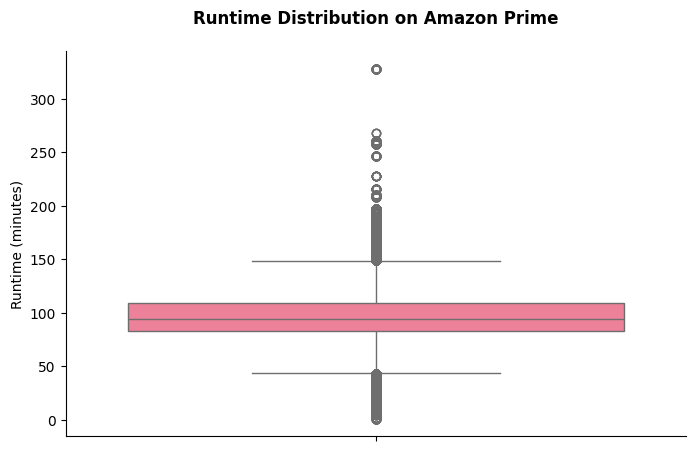

In [ ]:
# Box plot to show runtime distribution and outliers on Amazon Prime.

# Set the figure size
plt.figure(figsize=(8,5))

# Create box plot for Runtime
sns.boxplot(data=prime_data, y='runtime', color='#FF6F91')

# Title and axis labels
plt.title('Runtime Distribution on Amazon Prime', weight='bold', pad=20)
plt.ylabel('Runtime (minutes)')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

## Insights

*   A box plot quickly shows distribution, median, spread, and outliers in runtime, making it easy to spot patterns in content duration.

*   Most Amazon Prime content runs around 90–110 minutes with some content significantly longer, as seen by many outliers above 150+ mins.
*   Helps align new content runtimes with viewer preferences for better watch time.

*   There are many very long movies (outliers) on the platform. If these are too long, viewers may leave before finishing, reducing overall watch time and engagement.  





## Box Plot - IMDb Score distribution

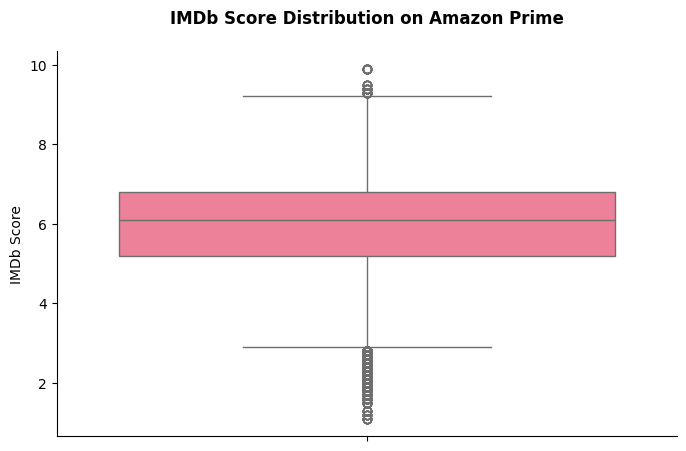

In [ ]:
# Box plot to show Imdb score distribution and outliers on Amazon Prime.
plt.figure(figsize=(8,5))

# Create box plot for IMDb scores
sns.boxplot(data=prime_data, y='imdb_score', color='#FF6F91')

# Title and axis labels
plt.title('IMDb Score Distribution on Amazon Prime', weight='bold', pad=20)
plt.ylabel('IMDb Score')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

Insights
- A box plot clearly shows the distribution, median, spread, and outliers of IMDb scores.
- Most content has IMDb scores between 5.5–7, indicating moderate to good ratings.
- This helps understand audience reception and platform content quality trends.
- A few very low-rated titles may affect platform perception if not managed.

## Count Plot - Content Type Distribution
Count plot shows how many times each category appears in your categorical column.

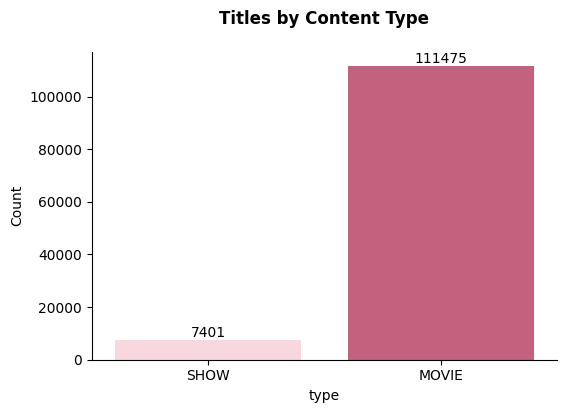

In [ ]:
# Count plot to show distribution of content type (Movie vs TV Show) on Amazon Prime.

plt.figure(figsize=(6,4))

# Define custom colors
colors = ['#FFD1DC', '#D45079']

# Create count plot
ax = sns.countplot(data=prime_data, x='type', palette=colors)

# Title and axis labels
plt.title('Titles by Content Type', weight='bold', pad=20)
plt.ylabel('Count')

# Add data values on bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# using despine to remove right and top borders
sns.despine()

#Display the plot
plt.show()

## Insights
- The count plot shows the split between Movies and TV Shows on the platform.
- Movies heavily outnumber TV Shows on Amazon Prime.
- Helps in understanding the current content mix provided to users.
- Indicates a potential to add more TV Shows if aiming to improve engagement and retention.

## Pie-Chart
A pie chart is a type of graph representing data in a circular form, with each slice of the circle representing a fraction or proportionate part of the whole.

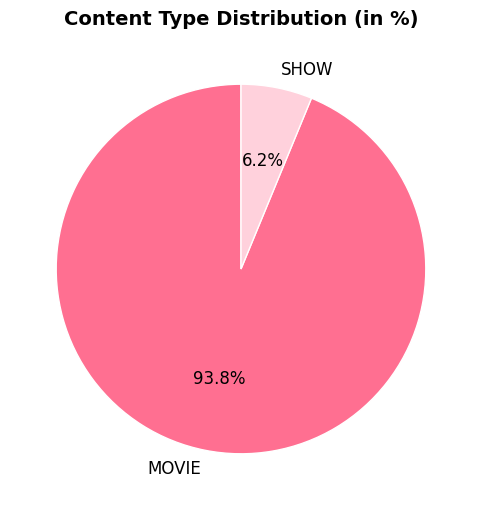

In [ ]:
# Pie Chart
# Value counts for Movies vs TV Shows
content_counts = prime_data['type'].value_counts()

# Extract labels and sizes
labels = content_counts.index
sizes = content_counts.values

# Define colors
colors = ['#FF6F91', '#FFD1DC']

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',   # show percentages with 1 decimal place
    startangle=90,       # start from top
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)

# Add a title
plt.title('Content Type Distribution (in %)', fontsize=14, weight='bold', pad=10)

# Show the plot
plt.show()

## Histogram - Release Year Distribution
A histogram is a plot that shows the frequency distribution of a continuous variable by dividing its values into bins (ranges) and counting how many values fall into each bin.

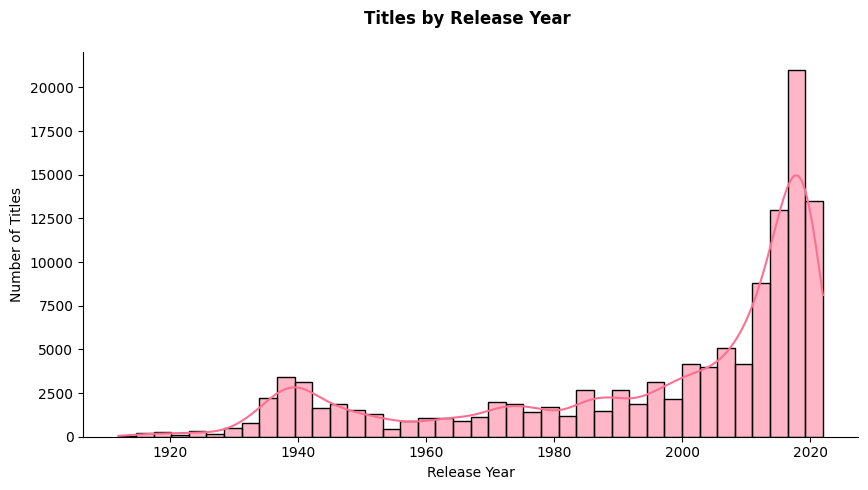

In [ ]:
# Histogram with KDE showing distribution of content release years on Amazon Prime.

plt.figure(figsize=(10,5))

# Create a histplot
sns.histplot(
    data=prime_data,
    x='release_year',
    bins=40,               # suitable bin count for smooth visualization
    kde=True,              # adds smooth distribution curve
    color='#FF6F91'
)

# Title and axis labels
plt.title('Titles by Release Year ', weight='bold', pad=20)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

## Insights
- The histogram with KDE shows how many movies and shows were released each year on the platform.
- Content releases have increased sharply after 2010, peaking around 2020.
- Indicates Amazon Prime's focus on adding recent content to its catalog.
- Few very old titles are also present, showing some diversity in library age range.



## Bar Plot - Season-wise Distribution




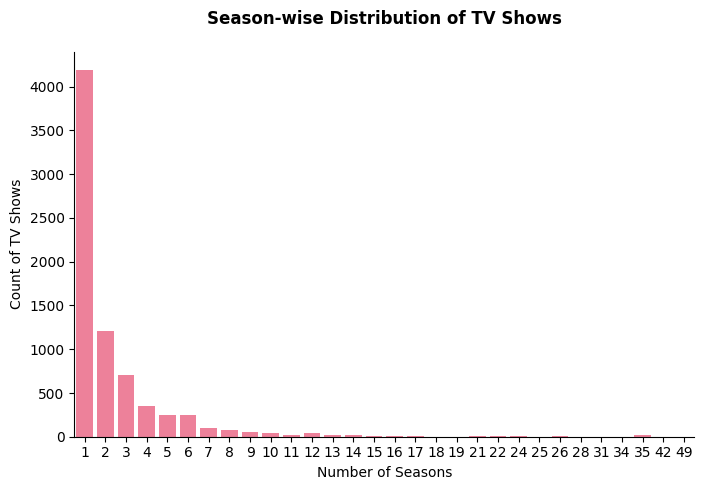

In [ ]:
# Bar plot to show season-wise distribution on Amazon Prime

plt.figure(figsize=(8,5))

# Create bar plot
sns.countplot(
    data=prime_data[prime_data['seasons'] > 0],  # only TV shows
    x='seasons',
    color='#FF6F91'
)
# Title and axis labels
plt.title('Season-wise Distribution of TV Shows', weight='bold', pad=20)
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

## Insights
- The bar plot shows how many TV shows have different numbers of seasons on the platform.
- Most TV shows have only 1–2 seasons, with fewer shows having higher season counts.
- Indicates a focus on mini-series or limited-series formats on the platform.
- Long-running shows are less common in the current catalog.

## Histogram - IMDb Score Distribution

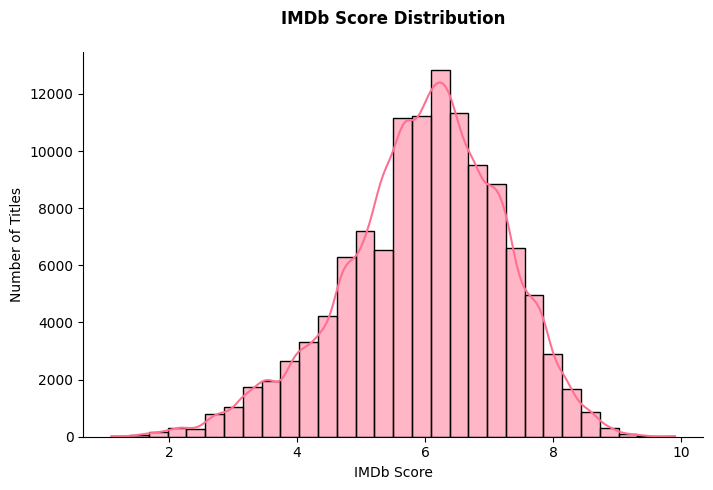

In [ ]:
# Create histogram with KDE to visualize IMDb Score distribution

plt.figure(figsize=(8,5))

# Create a histplot
sns.histplot(
    data=prime_data,
    x='imdb_score',
    bins=30,                # suitable bin count for smooth visualization
    kde=True,               # adds smooth distribution curve
    color='#FF6F91'
)

# Title and axis labels
plt.title('IMDb Score Distribution', weight='bold', pad = 20)
plt.xlabel('IMDb Score')
plt.ylabel('Number of Titles')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

## Insights
- The histogram with KDE shows the distribution of Imdb scores for movies and shows on the platform.
- Most content has IMDb scores between 5 and 7.
- This insight helps Prime maintain and improve content quality to attract and retain subscribers.
- No direct negative impact, but consistently low-rated content could lead to churn if not addressed proactively.

## Bar Plot - Age Certification Distribution

In [ ]:
# View counts of each age_certification category
prime_data.age_certification.value_counts()

# R - Restricted (17+), PG-13 - Parents Strongly Cautioned (13+),
# PG - Parental Guidance, G - General Audience,
# TV-MA - Mature Audience, TV-14 - 14+, TV-PG - Parental Guidance,
# TV-Y7 - 7+, TV-Y - All Children, TV-G - General Audience,
# NC-17 - Adults Only (18+)


,count
age_certification,
Unknown,63783
R,24977
PG-13,12319
PG,9437
G,3674
TV-MA,1712
TV-14,1478
TV-PG,494
TV-Y7,353


In [ ]:
# Remove 'Unknown' age certifications to focus on known categories
filtered_data = prime_data[prime_data['age_certification'] != 'Unknown']

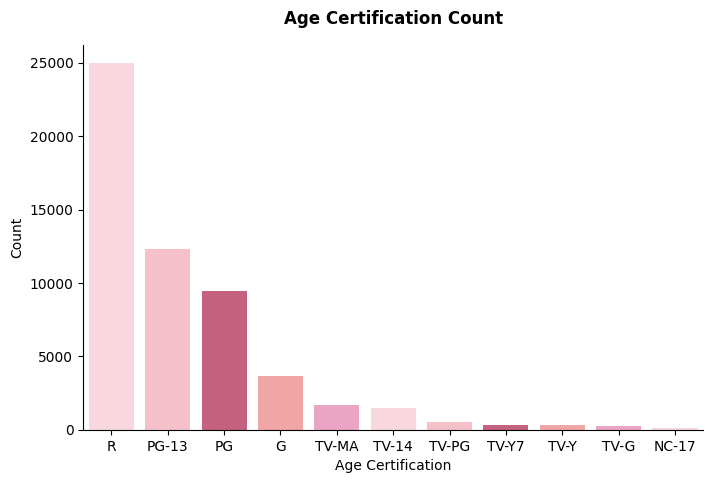

In [ ]:
# Bar plot to show the distribution of age certifications on Amazon Prime

plt.figure(figsize=(8, 5))

# Create bar plot to display frequency of each age certification
sns.countplot(
    data=filtered_data,
    x='age_certification',
    order=filtered_data['age_certification'].value_counts().index,
    palette=['#FFD1DC', '#FFB7C5', '#D45079', '#FB9A99', '#F49AC2']
)

# Title and axis labels
plt.title('Age Certification Count', weight='bold', pad=15)
plt.xlabel('Age Certification')
plt.ylabel('Count')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

## Insights
- The bar plot shows how many titles fall under each age certification category.
- Most content is certified for 13+ and 16+, indicating a focus on teen and young adult audiences.
- Fewer titles are in the 'All' and '18+' categories.
- Helps Prime add content for all age groups to reach more viewers and reduce churn.

## Bar Chart - Top 5 Production Countries

In [ ]:
# Count values for all production countries
country_counts = prime_data['production_countries'].value_counts()
country_counts

,count
production_countries,
['US'],66793
['IN'],10626
['GB'],6779
['CA'],3055
['JP'],1917
...,...
"['EG', 'GB']",1
"['US', 'GB', 'CA']",1
['AF'],1


In [ ]:
# Get top 5 production countries
top5_countries = country_counts.head(5)
print(top5_countries)

production_countries
['US']    66793
['IN']    10626
['GB']     6779
['CA']     3055
['JP']     1917
Name: count, dtype: int64


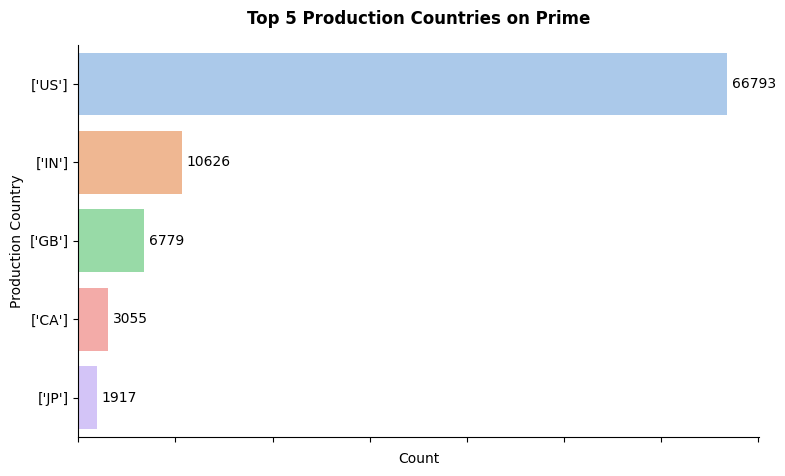

In [ ]:
# Bar plot to show top 5 production countries on amazon prime

plt.figure(figsize=(8, 5))

# Create bar plot
barplot = sns.barplot(
    x=top5_countries.values,
    y=top5_countries.index,
    palette='pastel'
)

# Title and labels
plt.title('Top 5 Production Countries on Prime', weight='bold', pad=15)
plt.xlabel('Count')
plt.ylabel('Production Country')
plt.tight_layout()

# Using despine to remove right and top borders
sns.despine()

# Hide x-axis tick labels but keep ticks
barplot.set_xticklabels([])

# Add count values next to each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(
        width + 500,                               # adjust spacing as needed
        p.get_y() + p.get_height() / 2,
        int(width),
        va='center',
        fontsize=10
    )

# Display the plot
plt.show()

## Insights
- A horizontal bar plot clearly compares country-wise counts, keeps labels easy to read, and highlights rank differences effectively.
- The US dominates Prime’s catalog (66,793 titles), with India, UK, Canada, and Japan contributing smaller shares, showing heavy US dependence and highlighting the need for regional content diversification.
-  Helps Prime diversify content strategy, guide regional marketing and licensing in underrepresented regions, and support subscriber growth beyond the US.
- Heavy US dependence may limit global growth, so Prime should diversify to prevent churn and stay competitive.

## Scatter Plot - TMDb Popularity vs IMDb Score
A scatter plot is a graph that shows the relationship between two numerical variables by displaying points on a graph.

Using `regplot` adds a trend line (regression line) on the scatter plot, helping to visualize the overall relationship between the variables (whether positive, negative, or no correlation).

Correlation: Correlation measures the strength and direction of the relationship between two numerical variables.

*   +1 → Strong positive (both increase together)
*   0 → No relationship
*   -1 → Strong negative (one increases, other decreases)
*   Closer to 1 or -1 = stronger relationship.
*   Closer to 0 = weak or no relationship.

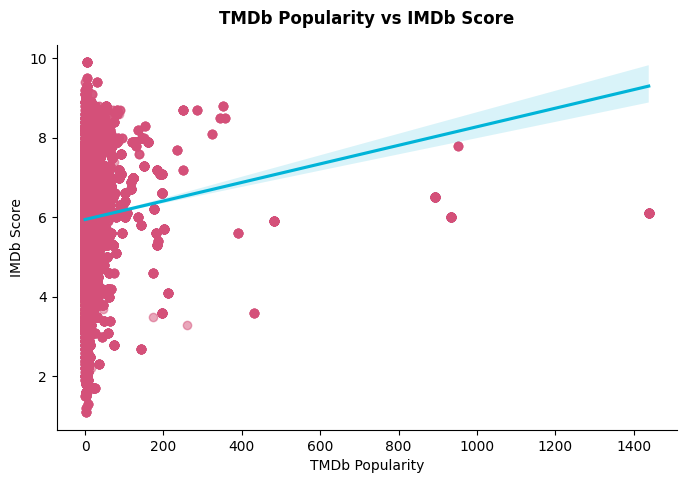

In [ ]:
# Scatter plot to visualize the relationship between TMDb popularity and IMDb score

plt.figure(figsize=(8,5))

# Create a scatter plot

sns.regplot(
    data=prime_data,
    x='tmdb_popularity',
    y='imdb_score',
    scatter_kws={'alpha':0.5, 'color':'#D45079'},
    line_kws={'color':'#00B4D8'}
)
# Title and axis labels
plt.title('TMDb Popularity vs IMDb Score', weight='bold', pad=15)
plt.xlabel('TMDb Popularity')
plt.ylabel('IMDb Score')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

In [ ]:
# Calculate correlation between TMDb popularity and IMDb score
prime_data['tmdb_popularity'].corr(prime_data['imdb_score'])

np.float64(0.07683198583366795)

## Insights
- There is a **very weak positive correlation (0.07)**, showing minimal relationship between TMDb Popularity and IMDb Score.
- High popularity **does not guarantee higher IMDb ratings**, indicating that popularity alone does not reflect perceived quality.
- Using TMDb Popularity to predict IMDb ratings will **not create significant positive business impact** due to the weak relationship.
- There is **no insight indicating negative growth**, but over-focusing on popularity **may not improve audience satisfaction.**

## Scatter Plot

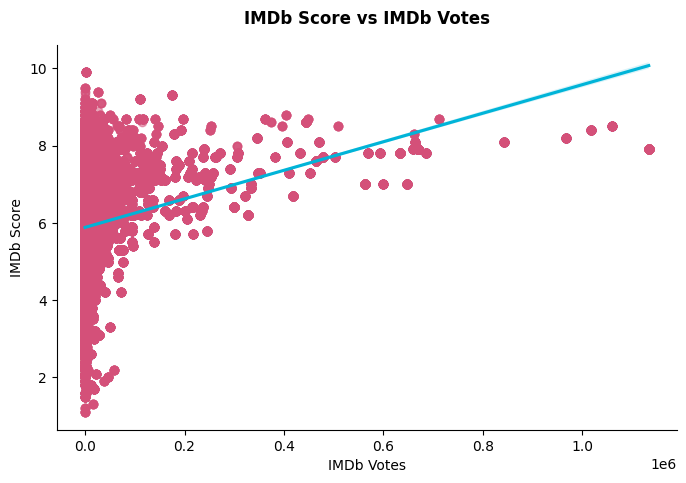

In [ ]:
# Scatter plot to visualize the relationship between TMDb popularity and IMDb score

plt.figure(figsize=(8,5))

sns.regplot(
    data=prime_data,
    x='imdb_votes',
    y='imdb_score',
    scatter_kws={'alpha':0.5, 'color':'#D45079'},
    line_kws={'color':'#00B4D8'}
)

# Title and axis labels
plt.title('IMDb Score vs IMDb Votes', weight='bold', pad=15)
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Score')

# using despine to remove right and top borders
sns.despine()
plt.show()

In [ ]:
# Calculate correlation between
prime_data['imdb_votes'].corr(prime_data['imdb_score'])

np.float64(0.2630277938534794)

## Insights
- Correlation (0.26) indicates a **weak to moderate positive relationship** between IMDb votes and IMDb scores.

- As the **number of IMDb votes increases**, IMDb scores **tend to increase slightly**, but not strongly.
- Increasing engagement (votes) **may slightly improve perceived scores**, but the impact on business KPIs will be **limited**.
- There is **no insight suggesting negative growth**, and increasing votes will **not harm audience ratings.**


## Violin plot
A violin plot shows the distribution, density, and summary statistics (median, IQR) of a numerical variable across categories in a single, clear visualization.

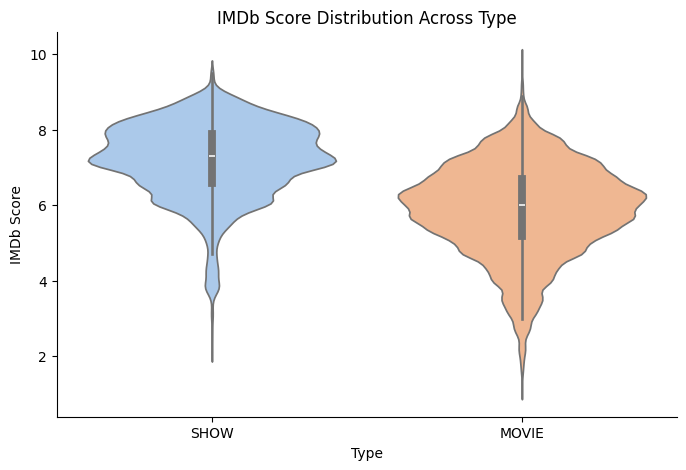

In [ ]:
#  Violin plot to compare IMDb scores across Type (Movies/Shows)

plt.figure(figsize=(8, 5))

# Create violin plot
sns.violinplot(
    data=prime_data,
    x='type',
    y='imdb_score',
    palette = 'pastel'
)

# Title and labels
plt.title('IMDb Score Distribution Across Type')
plt.xlabel('Type')
plt.ylabel('IMDb Score')

# using despine to remove right and top borders
sns.despine()

# Display the plot
plt.show()

## Insights
- TV shows generally have higher median IMDb scores compared to movies, indicating viewers may rate shows slightly better on average on Amazon Prime.
- The score distribution for TV shows is tighter, showing consistent viewer ratings, while movies have a wider spread, reflecting varied audience reception.
- This pattern aligns with Amazon Prime’s focus on consistent quality in TV shows while maintaining a diverse range of movie content, supporting informed decisions for content strategy and recommendations.

## Line Plot - Seasons vs Release Year
Line plots help data analysts visualize trends and patterns between two numerical variables, especially over time.

In [ ]:
# Sort by release year for correct line plot order
prime_data_sorted = prime_data.sort_values(by='release_year')

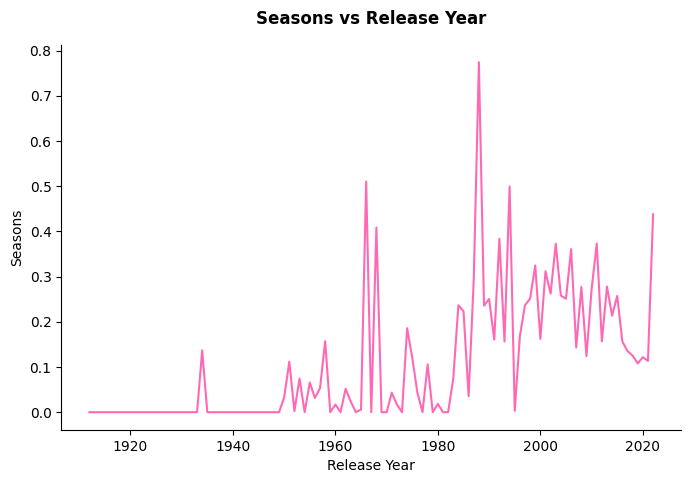

In [ ]:
# Plotting a line graph to visualize how the number of seasons changes over release years

plt.figure(figsize=(8, 5))

# Create a lineplot
sns.lineplot(data=prime_data, y='seasons', x='release_year', color='hotpink', ci=None )

# Title and labels
plt.title('Seasons vs Release Year', weight='bold', pad=15)
plt.xlabel('Release Year')
plt.ylabel('Seasons')

# Explicitly force ticks to appear
ax = plt.gca()
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

# using despine to remove right and top borders
sns.despine()
plt.show()

## Insights
- Shows with fewer seasons have been consistently released across years.
- A visible rise in the number of seasons occurred post-1980, indicating growth in TV content.
-  After 2000, season counts remain moderate, reflecting a preference for limited series.
- Overall, Amazon Prime leans towards short-format series with 1–2 seasons aligning with viewer trends.

## Multivariate analysis(multiple Variables)

## Correlation Heatmap
A correlation heatmap uses color shades to display the strength and direction of relationships between numerical variables.
*   Colors show how strong and in which direction variables are related.
*   Helps spot positive, negative, or no correlation quickly.

In [ ]:
# Select only numerical columns for correlation
numeric_columns = prime_data.select_dtypes(include=['int64', 'float64'])

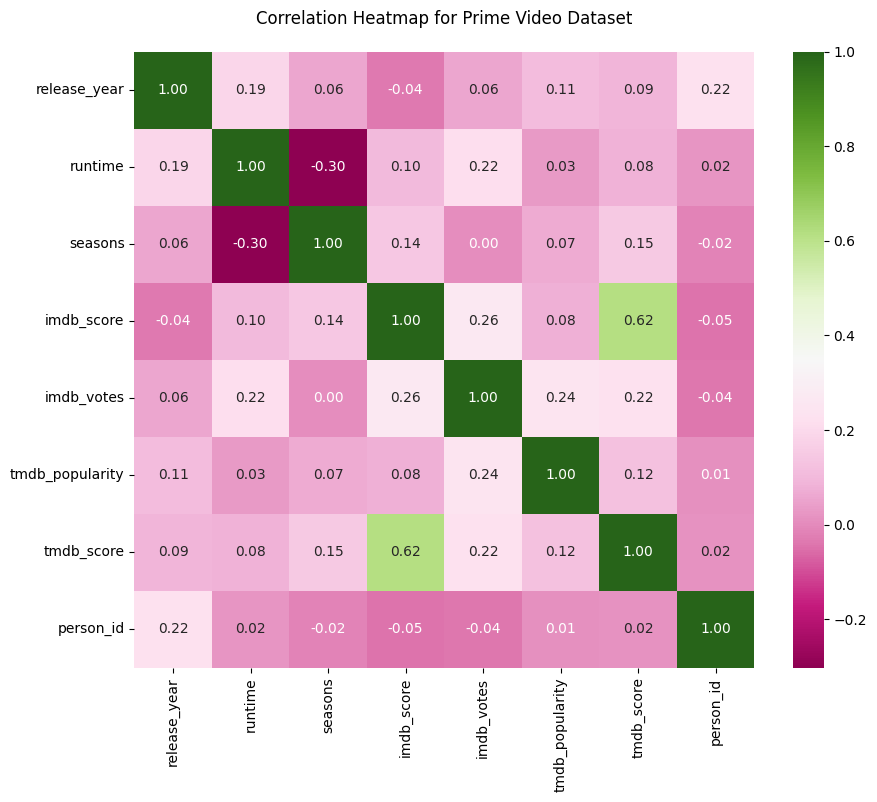

In [ ]:
# Calculate correlation matrix for your dataset
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.2f')

# Title
plt.title('Correlation Heatmap for Prime Video Dataset', pad=20)

# Display the data
plt.show()

## Insights
- IMDb votes have a **moderate positive correlation (~0.62) with IMDb scores**, indicating higher voted titles tend to have higher ratings.
- Higher votes link to higher ratings, but other metrics show weak correlation, so business impact is limited.
- No strong negative correlations were observed, **indicating no insights suggesting potential negative growth** by focusing on features like popularity or votes.
- Features like runtime, seasons, and release year show **weak to negligible correlations with IMDb scores and votes**, making them less impactful for rating-focused strategies.

## Pair Plot
A pair plot displays scatter plots for every pair of numerical variables in the dataset.

*   Shows relationships between variables
*   Diagonal shows each variable’s distribution.

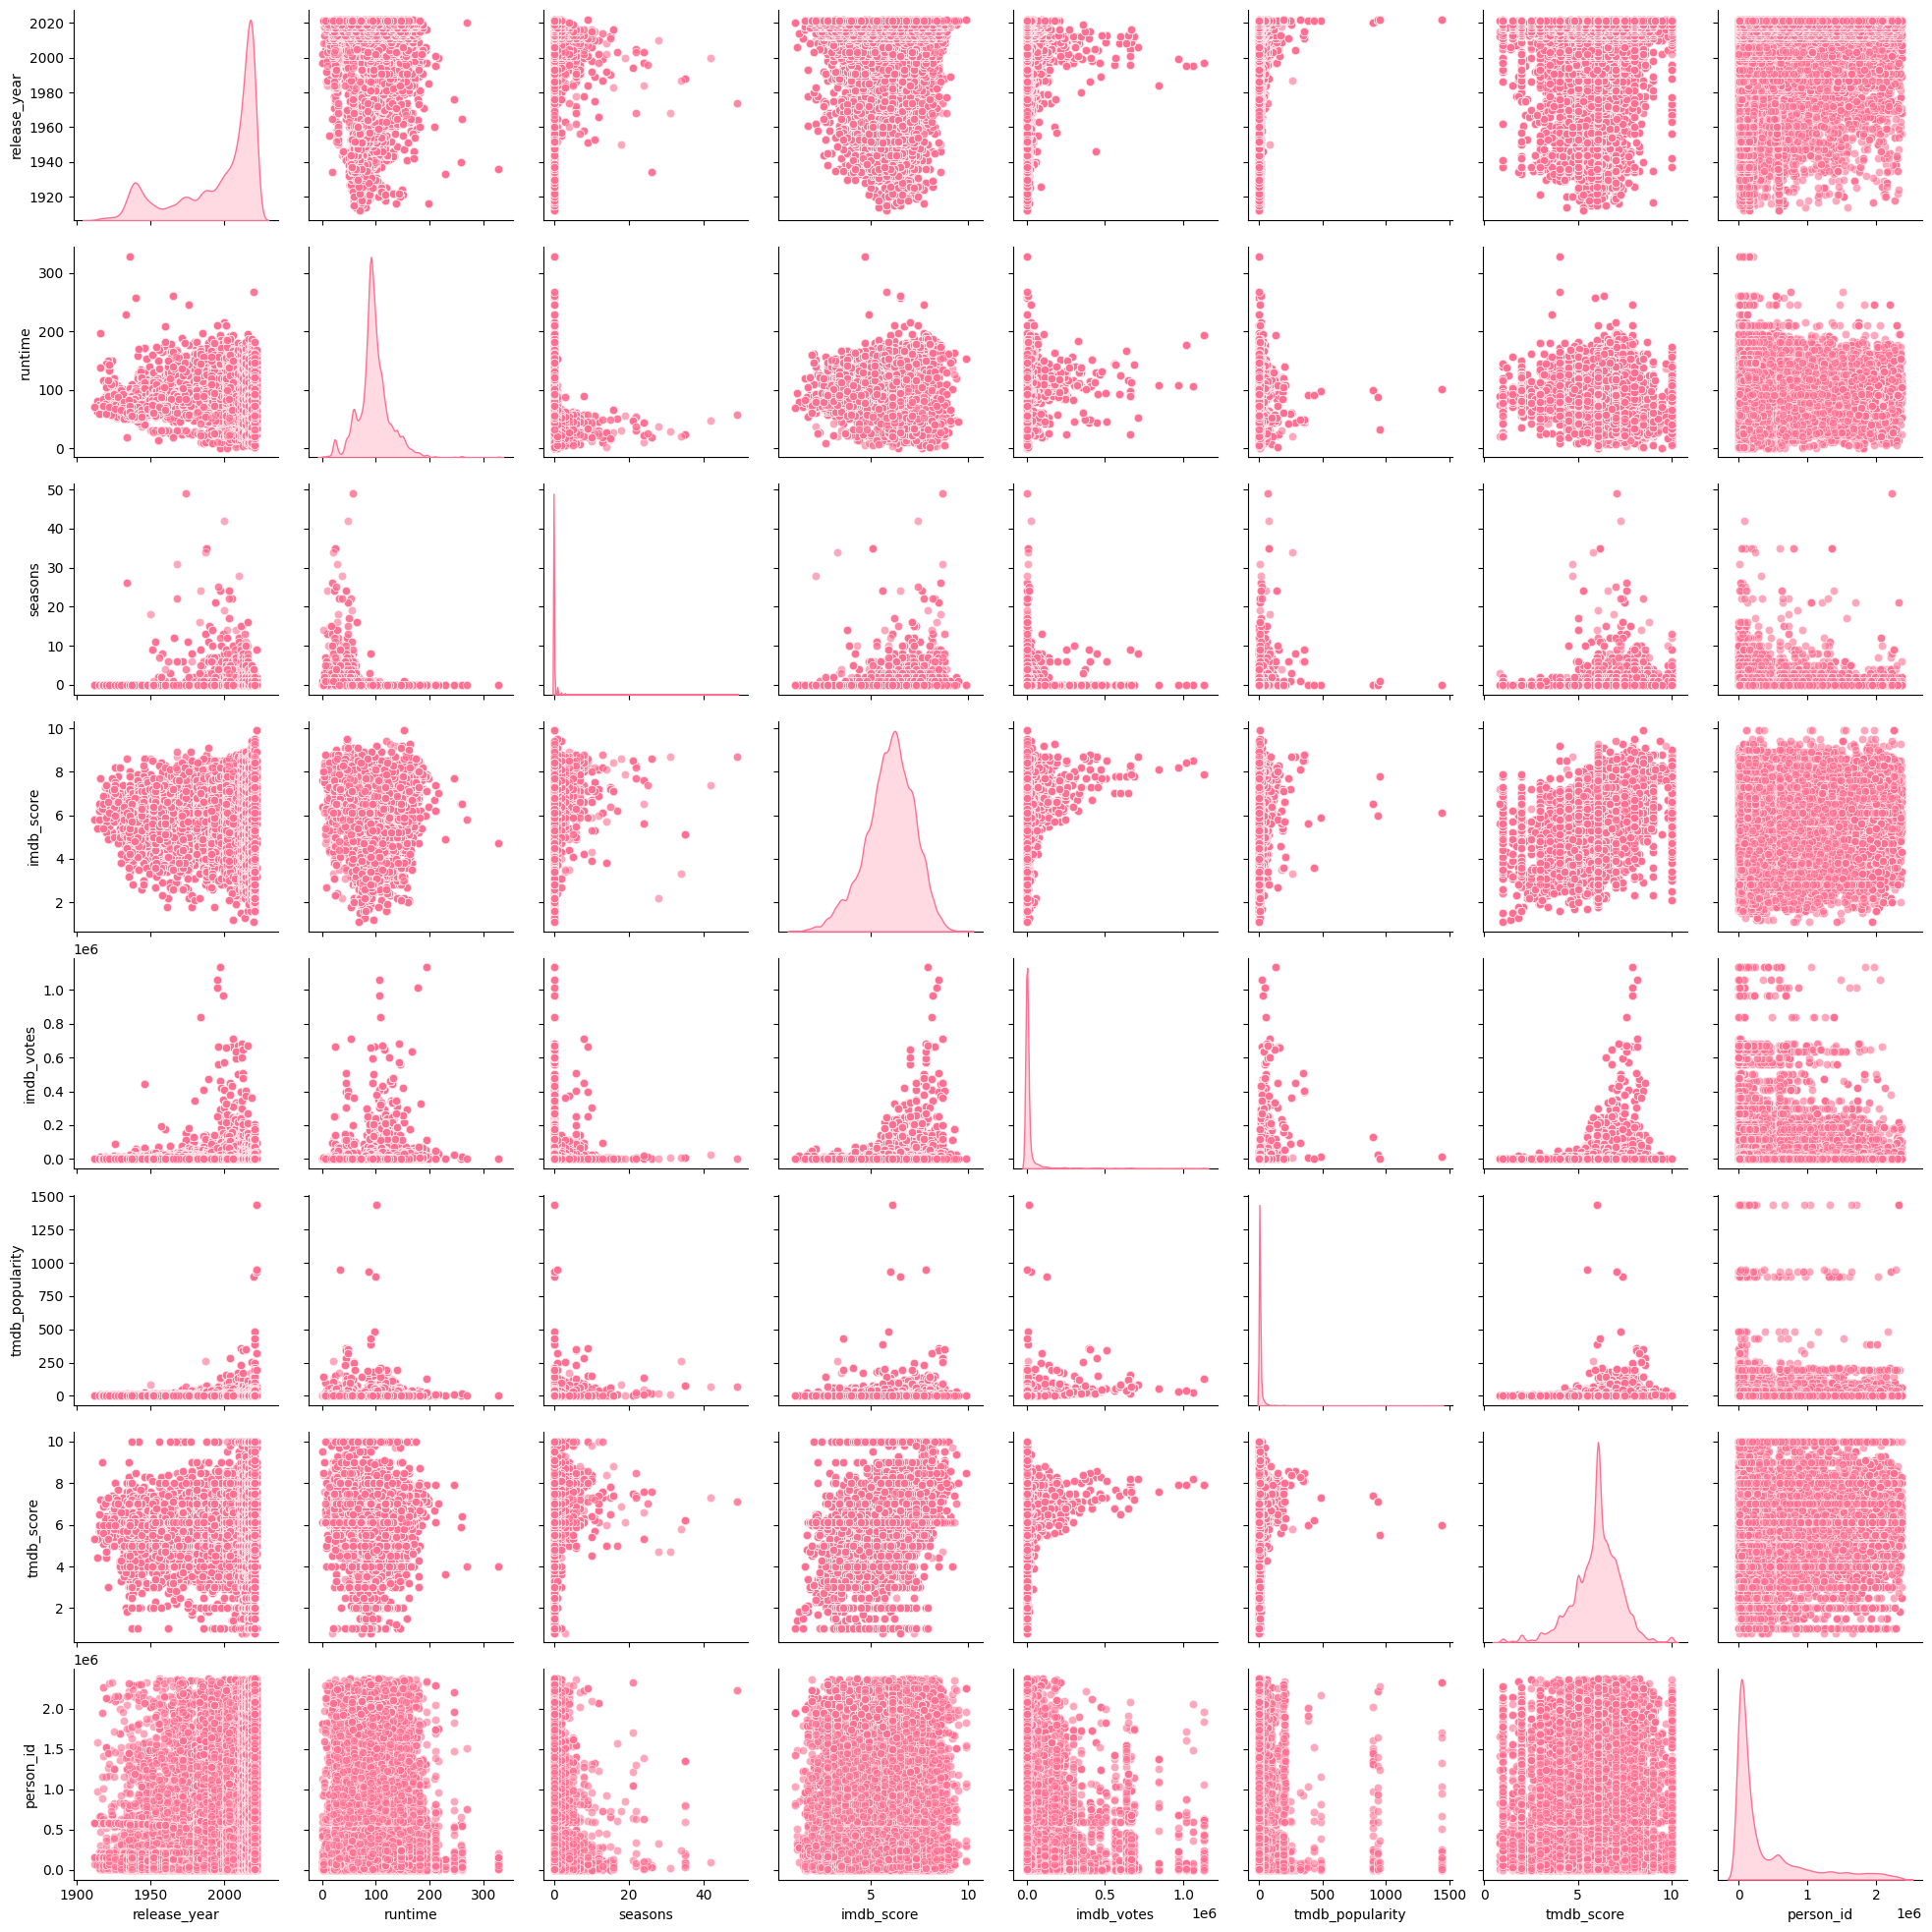

In [ ]:
# Create a pair plot for numerical columns in your dataset

sns.pairplot(prime_data, diag_kind='kde', plot_kws={'alpha': 0.6, 'color': '#FF6F91'}, diag_kws={'color': '#FF6F91'})

# Display the plot
plt.show()

## Insights
- A pair plot was used to visualize relationships between all numerical columns together in one view.
- It shows how features like IMDb score, runtime, and votes relate to each other with clear scatter trends.
-  The KDE on the diagonal helps see individual distributions for each numerical column easily.
- Helps identify correlations for modeling and areas needing data cleaning or feature engineering.

## **Actionable Strategy for Growth**

- Continue focusing on high-demand genres (Drama, Comedy, Action) while gradually adding diverse genres for wider audience reach.
- Add recent content with optimal runtimes and prioritize 13+ and 16+ segments to align with user preferences.
- Expand regional content in key markets (US, India, UK) to boost local engagement and growth.
- Leverage high IMDb-rated and popular titles to maintain platform reputation and sustained viewer interest.
- Invest in short-format (1–2 season) shows while testing longer series to improve retention.
- Prioritize quality over popularity, focusing on discoverability and content value as TMDb popularity weakly predicts ratings, while IMDb votes indicate moderate engagement.


# **Conclusion**

This Exploratory Data Analysis (EDA) of the **Amazon Prime Video dataset** has uncovered clear, actionable insights for platform strategy and audience alignment.

- **Content Strategy**: Amazon Prime Video is **movie-focused**, complemented by a growing catalog of short-format TV shows to diversify offerings.
- **Genre Trends**: Drama, Comedy, and Action dominate the library, reflecting **high viewer demand**, with opportunities to explore underrepresented genres for niche audiences.
- **Content Freshness**: Significant increase in content post-2010 shows Amazon’s focus on **maintaining a contemporary, relevant catalog**.
- **Runtime Patterns**: Most content aligns with the **90–110 minute range**, supporting user consumption preferences and improving completion rates.
- **Ratings Insights**: IMDb ratings trend moderately high, with older titles retaining value, indicating the benefit of leveraging classics to enhance engagement.
- **Audience Targeting**: Dominance of **13+ and 16+ certifications** reflects alignment with teen and young adult segments, critical for driving engagement.
- **Regional Contributions:** The **United States, United Kingdom, and India** lead content contributions, suggesting potential for **localized content strategies**.
- **Seasonal Trends**: TV shows predominantly have 1–2 seasons, with line plots showing stable trends across years, aligning with viewer preferences for limited series.
- **Correlation Findings**:IMDb votes moderately correlate with IMDb scores (~0.26–0.62), indicating higher engagement can reflect in better ratings, while TMDb popularity has a weak correlation, emphasizing content quality over popularity alone.

Overall, this EDA empowers Amazon Prime Video to refine its content strategy, improve viewer engagement, and drive sustainable subscription growth confidently. Future analysis can further explore regional performance, underrepresented genre testing, and content lifecycle trends to maximize platform value.
